# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Parte 2: Clasificación

__Número de grupo: 17__

__Nombres de los estudiantes: David del Cerro Domínguez y Sergio Ramos Mesa__

Conjunto de datos relacionado con el diagnóstico de enfermedades cardiovasculares recopilado por el hospital _V.A. Medical Center, Long Beach and Cleveland Clinic Foundation (Robert Detrano, M.D., Ph.D.)_ y donado por David W. Aha a [UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/Heart+Disease/).

El objetivo es distinguir si los pacientes tienen una enfermedad cardiovascular. El atributo `target` contiene un valor que puede ser 0 (no enfermedad) o 1-4 indicando distintos tipos de enfermedades.

Cada uno de los pacientes se describe mediante los siguientes atributos:
- `age`: age in years
- `sex`: sex (1 = male; 0 = female)
- `cp`: chest pain type (1: typical angina; 2: atypical angina; 3: non-anginal pain; 4: asymptomatic)
- `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
- `chol`: serum cholestoral in mg/dl
- `fbs`: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- `restecg`: resting electrocardiographic results (0: normal; 1:  ST-T wave abnormality; 2: probable or definite left ventricular hypertrophy)
- `thalach`: maximum heart rate achieved
- `exang`: exercise induced angina (1 = yes; 0 = no)
- `oldpeak`: ST depression induced by exercise relative to rest
- `slope`: the slope of the peak exercise ST segment (1: upsloping; 2: flat; 3: downsloping)
- `ca`: number of major vessels (0-3) colored by flourosopy
- `thal`: 3 = normal; 6 = fixed defect; 7 = reversable defect

Puede faltar datos en el conjunto de datos.

## 1) Carga del conjunto de datos

Carga el conjunto de datos en un dataframe a partir del fichero `cleveland.csv`. 

Como todas las variables están codificadas como números, debemos indicar cuales son categóricas. Podemos hacerlo en cada columna de la siguiente forma:
```python
df['sex'] = df['sex'].astype('category')
```

En este problema sólo nos interesa saber si los pacientes están enfermos o no así que modifica esa columna del dataframe para que sólo tenga dos valores de tipo cadena: 'normal' y 'enfermo'.

Elimina los pacientes que tengan datos incompletos.

In [17]:
import pandas as pd
import numpy as np

#Leemos csv y creamos un dataframe
df1 = pd.read_csv('cleveland.csv')  

#Variables categoricas
df1['sex'] = df1['sex'].astype('category')
df1['cp'] = df1['cp'].astype('category')
df1['fbs'] = df1['fbs'].astype('category')
df1['restecg'] = df1['restecg'].astype('category')
df1['exang'] = df1['exang'].astype('category')
df1['slope'] = df1['slope'].astype('category')
df1['thal'] = df1['thal'].astype('category')


#Calculamos el resultado de target
df1['target'] = np.where(df1['target'] > 0,"enfermo","normal")

#Borramos los pacientes con datos incompletos
df1.dropna(inplace=True)

df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,normal
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,enfermo
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,enfermo
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,normal
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,enfermo
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,enfermo
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,enfermo
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,enfermo


La información relevante acerca de este apartado es que nos encontramos ante un problema de aprendizaje supervisado de clasificación. La variable de salida (y) es 'target'.

## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica si debemos tenerlo en cuenta de algún modo.

Comprueba los rangos y distribuciones de las variables numéricas.

Estudia las relaciones 2 a 2 de las variables numéricas. Dibuja el diagrama de dispersión y calcula los coeficientes de correlación de Pearson. ¿Hay pares variables que separen bien las clases? ¿Hay correlaciones claras entre las variables? 

¿Crees que va a ser un problema sencillo o complicado de resolver?

<AxesSubplot:ylabel='target'>

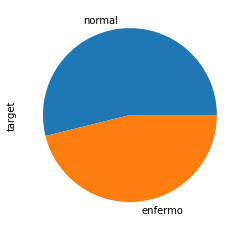

In [18]:
#Para saber si las calses están equilibradas utilizamos un gráfico que nos muestra el porcentaje 
#de pacientes de cada tipo
df1['target'].value_counts().plot.pie()

In [19]:
#Vamos a comprobar a continuación los rangos y variables de las variables numéricas utilizando
#la función describir. En nuestro caso vamos a separar los datos entre pacientes enfermos y sanos
#y haremos un análisis de los datos obtenidos. Veamos los resultados:

#Descripción de los pacientes enfermos
df1[df1['target'] == 'enfermo'].describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,56.759124,134.635036,251.854015,139.109489,1.589051,1.145985
std,7.899670,18.896730,49.679937,22.710673,1.305006,1.018506
min,35.000000,100.000000,131.000000,71.000000,0.000000,0.000000
25%,53.000000,120.000000,218.000000,125.000000,0.600000,0.000000
50%,58.000000,130.000000,253.000000,142.000000,1.400000,1.000000
75%,62.000000,145.000000,284.000000,157.000000,2.500000,2.000000
max,77.000000,200.000000,409.000000,195.000000,6.200000,3.000000


In [20]:
#Descripción de los pacientes sanos
df1[df1['target'] == 'normal'].describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,160.000000,160.00000,160.00000,160.000000,160.00000,160.000000
mean,52.643750,129.17500,243.49375,158.581250,0.59875,0.275000
std,9.551151,16.37399,53.75755,19.043304,0.78716,0.633945
min,29.000000,94.00000,126.00000,96.000000,0.00000,0.000000
25%,44.750000,120.00000,208.75000,149.000000,0.00000,0.000000
50%,52.000000,130.00000,235.50000,161.000000,0.20000,0.000000
75%,59.000000,140.00000,268.25000,172.000000,1.10000,0.000000
max,76.000000,180.00000,564.00000,202.000000,4.20000,3.000000


Lo primero que podemos observar es que existen muchos más pacientes sanos que pacientes enfermos. Esto podríamos verlo con más detenimiento utilizando un gráfico. 

Observando las medias (mean) podemos observar como no existe un par de valores claro que separe las clases (enfermo o sano). La mayor diferencia se presenta en el ca (number of major vessels) que tiene un incremento del 38% en pacientes enfermos. 

In [21]:
#Para estudiar la correlación entre las variables 2 a 2 vamos a utilizar el coheficiente de correlación de Pearson 
#Este método lo hemos usado en prácticas anteriores y sirve para saber como de relacionadas están dos variables

#Seguido de la correlación de pearson entre pares de variables
#df1.corr(method='pearson')
correl = df1.corr(method='pearson')
correl

,age,trestbps,chol,thalach,oldpeak,ca
age,1.000000,0.290476,0.202644,-0.394563,0.197123,0.362210
trestbps,0.290476,1.000000,0.131536,-0.049108,0.191243,0.097954
chol,0.202644,0.131536,1.000000,-0.000075,0.038596,0.115945
thalach,-0.394563,-0.049108,-0.000075,1.000000,-0.347640,-0.268727
oldpeak,0.197123,0.191243,0.038596,-0.347640,1.000000,0.294452
ca,0.362210,0.097954,0.115945,-0.268727,0.294452,1.000000


Los datos obtenidos demuestran que no existe una correlación clara entre las variables.
Dibujemos a continuación el diagrama de dispersión para tener una referencia visual de los datos obtenidos.

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='trestbps', ylabel='age'>,
        <AxesSubplot:xlabel='chol', ylabel='age'>,
        <AxesSubplot:xlabel='thalach', ylabel='age'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='age'>,
        <AxesSubplot:xlabel='ca', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='trestbps'>,
        <AxesSubplot:xlabel='trestbps', ylabel='trestbps'>,
        <AxesSubplot:xlabel='chol', ylabel='trestbps'>,
        <AxesSubplot:xlabel='thalach', ylabel='trestbps'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='trestbps'>,
        <AxesSubplot:xlabel='ca', ylabel='trestbps'>],
       [<AxesSubplot:xlabel='age', ylabel='chol'>,
        <AxesSubplot:xlabel='trestbps', ylabel='chol'>,
        <AxesSubplot:xlabel='chol', ylabel='chol'>,
        <AxesSubplot:xlabel='thalach', ylabel='chol'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='chol'>,
        <AxesSubplot:xlabel='ca', ylabel='chol'>],
       [<AxesSubplot:x

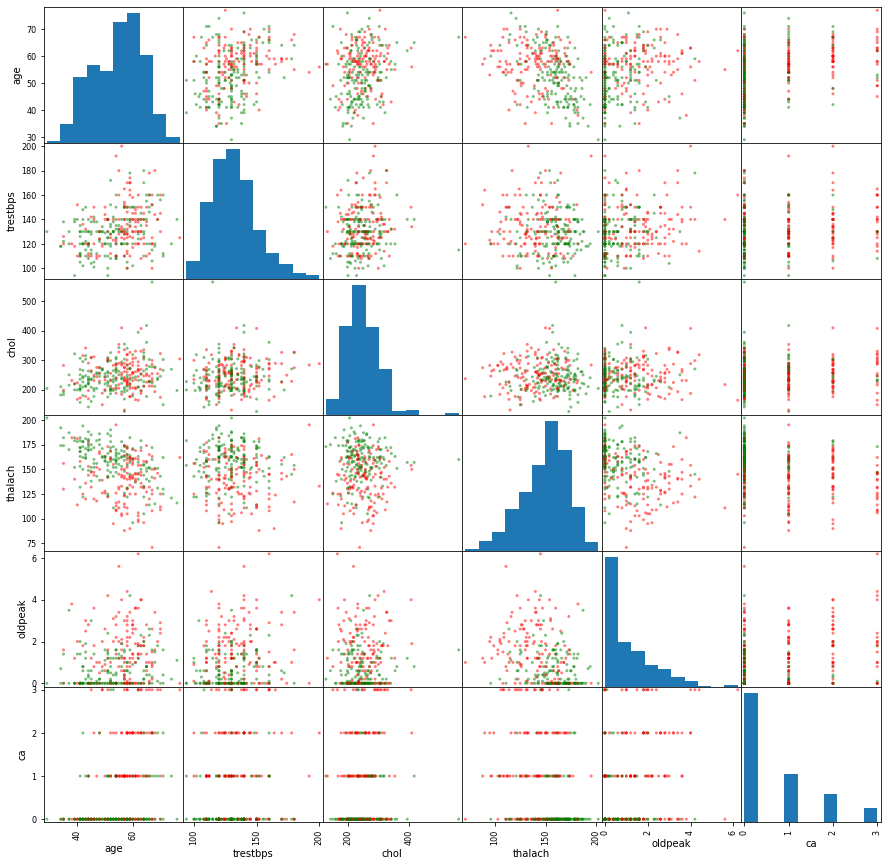

In [22]:
from pandas.plotting import scatter_matrix

dic_colors = {'enfermo': 'red', 'normal': 'green' }
colors = df1['target'].map(dic_colors)

scatter_matrix(df1, figsize = (15, 15), diagonal = 'hist', color=colors)

Concluimos pues que los datos son muy dispersos y va a resultar una ardua tarea encontrar con una respuesta optima al problema. 

Como el conjunto de datos es muy pequeño vamos a utilizar validación cruzada para resolver el problema y de esta manera encontrar la mejor solución posible. 

## 3) Normalizar los datos

Decide razonadamente si es necesario escalar o estandarizar los datos teniendo en cuenta que vamos a construir un árbol de decisión.

Como vamos a utilizar árboles de decisión no es necesario reescalar los datos.

## 4) Profundidad óptima del árbol

Elige razonadamente la profundidad óptima del árbol de decisión usando validación cruzada en 10 partes. Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.

Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. Crea un array que contenga sólo los datos de entrenamiento (sin la variable `target`) y otro array que sólo contenga la variable de salida.

__Nota__: parece que la clase DecisionTreeClassifier no es capaz de trabajar con variables categóricas y usa sus correspondientes valores numéricos. Eso no es una buena idea porque establece una distancia entre las categorías que no tiene por qué tener sentido. Se podrían recodificar las variables categóricas usando un [OneHotEnconder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) pero en esta práctica no es necesario hacerlo.

In [23]:
df1['target'].value_counts() / df1['target'].count() * 100

normal     53.872054
enfermo    46.127946
Name: target, dtype: float64

In [24]:
#Aplicamos el algoritmo de validación cruzada
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

RANDOM_STATE = 16

#Preparamos la variable de salida (dfT)
dfT = df1['target']
df2 = df1
del(df2['target'])

# Entrenamos y validamos varios árboles con distintas profundidades máximas
max_depths = range(1, 6)
for md in max_depths: 
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=md, min_samples_split=2, random_state=RANDOM_STATE)
    scores = cross_validate(clf, df2, dfT, scoring='accuracy', cv=10, return_train_score=False)
    
scores

{'fit_time': array([0.00700045, 0.00798702, 0.00698757, 0.00601149, 0.00701094,
        0.00700164, 0.00699711, 0.00699878, 0.00700569, 0.00800204]),
 'score_time': array([0.00401068, 0.00401449, 0.00399709, 0.00399399, 0.00398707,
        0.00400162, 0.00400209, 0.00299978, 0.00399709, 0.00400066]),
 'test_score': array([0.83333333, 0.7       , 0.83333333, 0.83333333, 0.8       ,
        0.76666667, 0.63333333, 0.68965517, 0.72413793, 0.72413793])}

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier, export_graphviz

train_accuracy = []
test_accuracy = []

# Entrenamos y validamos varios árboles con distintas profundidades máximas
max_depths = range(1, 6)
for md in max_depths: 
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=md, min_samples_split=2, random_state=RANDOM_STATE)
    scores = cross_validate(clf,df2, dfT, scoring='accuracy', cv=10, return_train_score=True)

    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))

train_accuracy, test_accuracy

([0.764682206942814,
  0.7706691262787189,
  0.8518516965733133,
  0.8720484655374812,
  0.9143314327240205],
 [0.7404597701149426,
  0.7104597701149425,
  0.7906896551724139,
  0.7608045977011495,
  0.753793103448276])

## 5) Analizando el árbol de decisión

Crea un nuevo árbol de decisión con la profundidad óptima y dibújalo. Analiza:
- ¿Cuáles son las variables más importantes y en qué orden? 
- ¿Hay variables del conjunto de datos que no se han usado? 
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 
- ¿El árbol que hemos construido es capaz de separar las clases? 
- ¿En cuál de los nodos hoja existe mayor confusión?

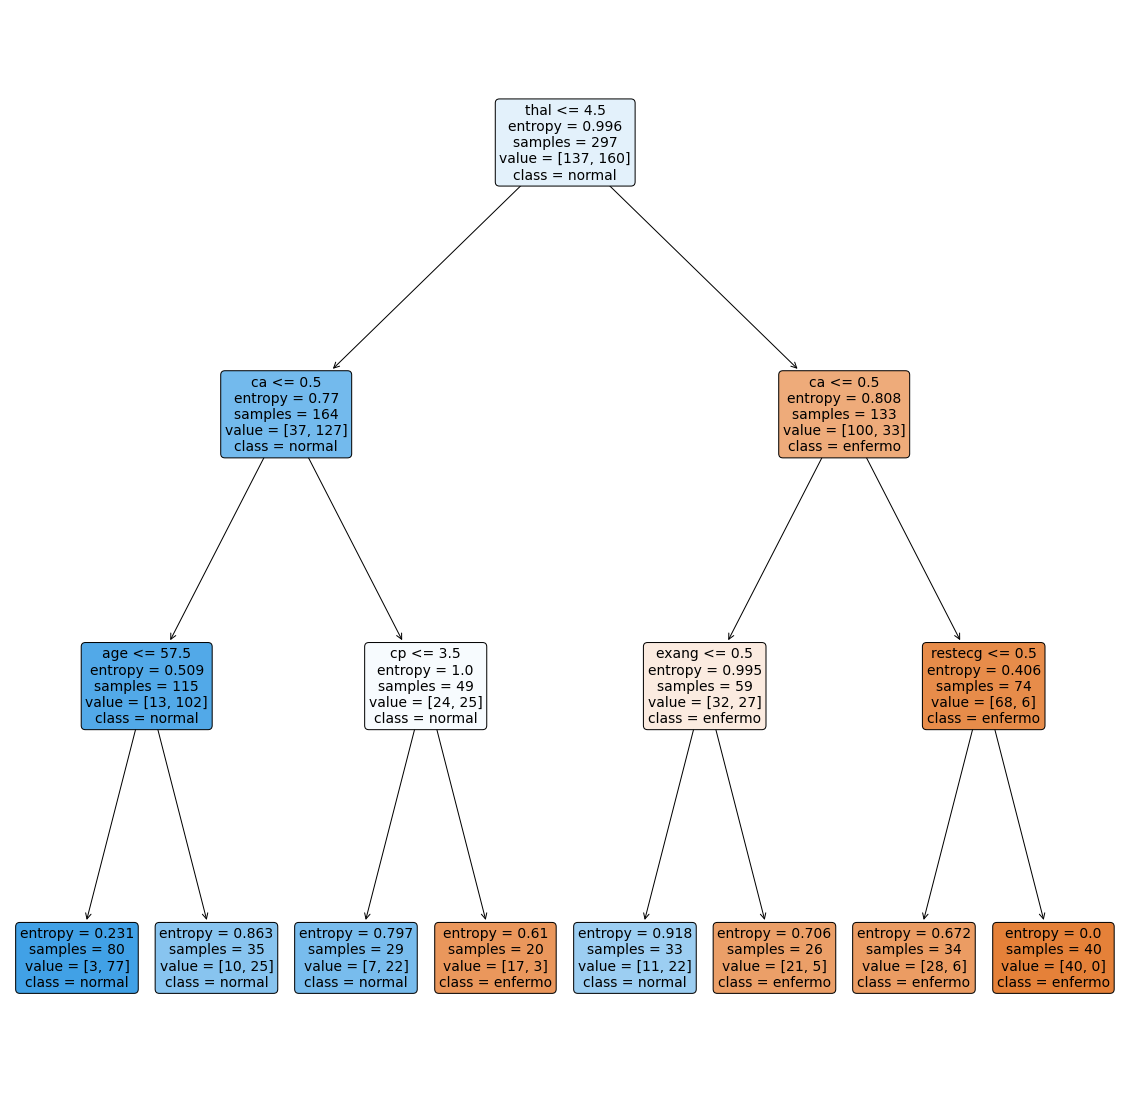

In [28]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

data_top = list(df2.columns)
data_types = ['enfermo', 'normal']

#Entrenamos el arbol
#Obtenidas las puntuaciones de las diferentes profundidades nos fijamos que el mejor valor coincide con profundidad 3 (0.74)
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2, random_state=RANDOM_STATE)
clf = clf.fit(df2, dfT)

# Pintamos el árbol
plt.figure(figsize=(20,20))
plot_tree(clf, filled=True, feature_names=data_top, class_names=data_types, rounded=True)
plt.show()

- En un rango (1,6) nuestro árbol ha obtenido la profundidad 6.

- El algortimo que se usa para construir el árbol hace que los primeros niveles del árbol contengan las variables que mejor discriminan las clases que estamos tratando de modelar. En nuestro caso sería cp, age y exang.

- La tasa de aciertos sobre una sola pregunta sería 

- El árbol no termina separando todas las clases.

## 6) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en un hospital real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

In [29]:
#Para comprobar el error de nuestro sistema vamos a separar nuestra población en dos partes
#Una parte para el entrenamiento y otra parte para el test.
from sklearn.model_selection import train_test_split

# Validación cruzada dividiendo el conjunto de datos en 10 partes (folds)
scores = cross_validate(clf, df2, dfT, scoring='accuracy', cv=10, return_train_score=True)

train_accuracy = np.mean(scores['train_score'])
test_accuracy = np.mean(scores['test_score'])
train_accuracy, test_accuracy

(0.8518516965733133, 0.7906896551724139)

Segun los datos obtenidos con validación cruzada con k = 10, la predicción tiene un nivel de aciertos muy bajo. En general el clasificador no dispone de datos suficientes para decidir correctamente el estado de un paciente. 

Tras hacer un estudio sobre diferentes entrenamientos hemos concluido que partir los datos en 80% entrenamiento, 20% test produce mejores resultados en el entrenamiento y una perdida no considerable de rendimiento en el test. Al tener tan pocos datos podría tratarse de una estadistica muy poco fiable. Dejamos constancia de los datos obtenidos.

In [30]:
# Partimos el conjunto de datos en entrenamiento (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(df2, dfT, test_size=0.2, random_state=RANDOM_STATE)

# Creamos y entrenamos el árbol de decisión con los parámetros por defecto
clf2 = clf.fit(X_train, y_train)

# Calculamos la precisión del modelo de entrenamiento y de test
train_accuracy = clf2.score(X_train, y_train)
test_accuracy = clf2.score(X_test, y_test)
train_accuracy, test_accuracy

(0.8481012658227848, 0.7166666666666667)

In [31]:
#Veamos a continuación las metricas detalladas por cada clase:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Escribimos las métricas que queremos evaluar
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Mostrar las métricas agregadas para el score calculado apartados atras
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

KeyError: 'test_precision_weighted'

In [145]:
#Veamos las medias por cada clase
from sklearn.metrics import classification_report

predictions = cross_val_predict(clf, df2, dfT, cv=10)
cr = classification_report(dfT,predictions, target_names=data_types)
print(cr)

              precision    recall  f1-score   support

     enfermo       0.31      0.13      0.19        89
      normal       0.70      0.87      0.78       208

    accuracy                           0.65       297
   macro avg       0.50      0.50      0.48       297
weighted avg       0.58      0.65      0.60       297



Como hemos comentado en varias ocasiones anteriormente, al haber tan pocos datos es muy dificil que el sistema tenga un buen entrenamiento. La precisión de la salida obtenida es muy baja. Mucho mejor en pacientes sanos (no enfermos) ya que la población es mucho mayor.

Veamos a continuación la matriz de confusión

In [148]:
# Función extraída de
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


In [151]:
plot_confusion_matrix(dfT, predictions, data_types, normalize=False)

TypeError: only integer scalar arrays can be converted to a scalar index

La conclusión final es que no merece la pena utilizar este sistema con tan pocos datos debido al mal enterno que tiene y la poca precisión que devuelve. Si utilizasemos un conjunto de datos mucho mayor no sería posible utilizar validación cruzada debido al tiempo que requiere su ejecución cuando los datos son muy grandes. 